#K-means números aleatorios

##Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
#guardar los graficos en el cuaderno de jupyter
%matplotlib inline

##creamos unos arrays con números aleatorios

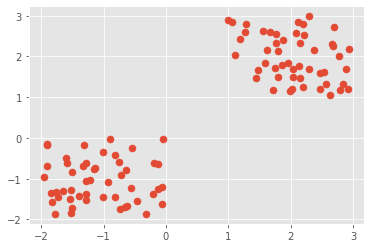

In [ ]:
#array de 100x2
X= -2 * np.random.rand(100,2)
#cambiamos datos de la columna 0 entre el 50 al 100 con datos lejanos
X[50:100, :] = 1 + (2 * np.random.rand(50,2))
#generamos dos grupos (columna1 y columna2)
plt.scatter(X[ : , 0], X[ :, 1], s = 50)
plt.show()

##Creamos la instancia del algoritmo

In [ ]:
#como sabemos de entrada que son dos grupos entonces seran dos centroides
Kmean = KMeans(n_clusters=2)
Kmean.fit(X)

KMeans(n_clusters=2)

##buscamos los centroides

In [ ]:
Centros = Kmean.cluster_centers_

##dibujamos los centroides para cada clouster

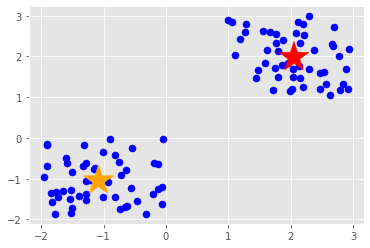

In [ ]:
colores=['orange','red']
plt.scatter(X[ : , 0], X[ : , 1], s =50, c='b')
plt.scatter(Centros[:, 0], Centros[:, 1], marker='*', c=colores, s=1000)
plt.show()

##probando el algoritmo


In [ ]:
#forma como se crearon los cluster (0 y 1)
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

##Probando con datos manuales

In [ ]:
#https://www.w3resource.com/numpy/manipulation/reshape.php
data_test=np.array([-3.0,-3.0]).reshape(1, -1)
Kmean.predict(data_test)

array([0], dtype=int32)

#k-means prestamos bancarios

##importando librerias

In [ ]:
import pandas as pd
import numpy as np
import random as rd

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

##importando dataset

In [ ]:
df_bank = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/k-means-prestamos.csv")
df_bank.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


##conociendo los datos

In [ ]:
df_bank.describe()
#df_bank.isnull().sum()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


tomaremos sólo dos variables de los datos – "LoanAmount"/monto del prestamos y "ApplicantIncome"/ingresos del cliente 

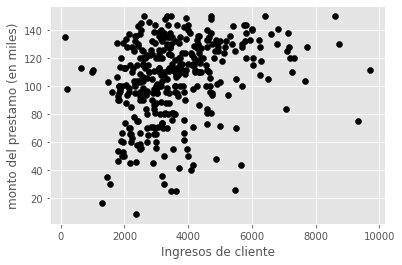

In [ ]:
X = df_bank[["LoanAmount","ApplicantIncome"]]
#Visualizamos los datos
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('Ingresos de cliente')
plt.ylabel('monto del prestamo (en miles)')
plt.show()

##buscando los centroides

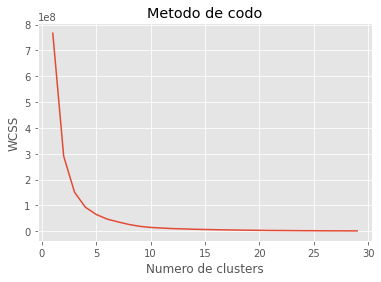

In [ ]:
#WCSS es la suma de cuadrados de las distancias
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.predict(X)
print(centroids)
print(labels)

[[  96.3490566  2142.04716981]
 [ 117.94444444 5698.55555556]
 [ 102.58518519 3213.24444444]
 [ 119.66666667 7712.13333333]
 [ 111.20224719 4294.8988764 ]]
[4 2 0 1 0 2 0 0 0 4 2 2 4 0 3 0 2 2 4 0 2 2 4 2 0 2 2 2 0 0 4 4 2 1 1 0 4
 0 2 4 4 2 0 2 2 0 2 4 2 3 4 0 2 4 2 0 2 4 4 0 2 0 2 2 4 2 0 0 4 0 4 2 3 0
 1 2 1 0 4 0 2 2 0 2 2 4 4 2 4 2 0 0 4 1 0 2 2 0 2 3 4 0 0 0 2 4 2 0 2 0 0
 4 2 0 0 4 4 4 0 2 0 2 4 4 2 4 0 2 2 1 2 4 0 2 1 4 0 4 2 1 4 0 2 2 2 2 4 2
 1 0 1 2 1 3 1 2 0 2 0 1 1 4 0 3 1 4 2 2 2 2 0 4 2 2 4 4 0 0 2 0 2 4 2 4 2
 1 4 4 0 0 2 1 0 4 4 0 2 2 0 1 2 2 0 2 0 4 2 4 4 0 4 2 2 1 4 0 2 0 2 0 1 0
 4 4 2 4 4 2 3 1 0 1 2 2 4 3 4 2 1 2 3 4 2 0 0 1 0 0 2 2 2 2 4 0 2 2 0 0 4
 0 0 4 0 2 0 2 1 2 0 3 0 4 1 2 2 3 1 0 2 0 3 4 2 4 2 2 0 0 4 0 3 4 4 4 3 1
 4 1 2 0 4 0 4 0 2 2 0 0 2 0 2 2 2 2 0 4 2 0 2 4 4 2 2 2 0 2 0 2 2 0 0 1 4
 2 3 4 2 0 2 2 4 0 2 0 2 2 0 1 2 2 1 0 2 1 4 2 2 0 2 1 2 2 2 0 0 2 0 2 0 0
 4 2 2 4 4 2 1 2 2 4 4]


##graficando datos y centroides

In [ ]:
colores=['blue','red','green','yellow','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

[ 96.3490566  117.94444444 102.58518519 119.66666667 111.20224719]


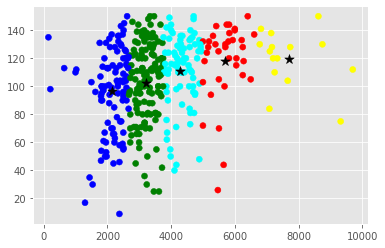

In [ ]:
print(centroids[:, 0])
# mostramos grupos según Openess y Extraversion 
f1 = df_bank['ApplicantIncome'].values
f2 = df_bank['LoanAmount'].values
 
plt.scatter(f1, f2, c=asignar)
#
plt.scatter(centroids[:, 1], centroids[:, 0], marker='*', c='black', s=100)
plt.show()

##resultados en tablas

In [ ]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_bank.index.values
df_cluster['data_index']= df_bank.Education
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

,data_index,cluster
0,Graduate,4
1,Graduate,2
2,Not Graduate,0
3,Graduate,1
4,Not Graduate,0


In [ ]:
df_cluster[df_cluster.cluster == 4]

,data_index,cluster
0,Graduate,4
9,Graduate,4
12,Not Graduate,4
18,Not Graduate,4
22,Graduate,4
...,...,...
370,Graduate,4
373,Graduate,4
374,Not Graduate,4
379,Graduate,4


#k-means psicología (los grandes cinco)


---
*   “op” = Openness to experience – grado de apertura mental a nuevas experiencias, curiosidad, arte
*   “co” =Conscientiousness – grado de orden, prolijidad, organización
*   “ex” = Extraversion – grado de timidez, solitario o participación ante el grupo social
*   “ag” = Agreeableness – grado de empatía con los demás, temperamento
*   “ne” = Neuroticism, – grado de neuroticismo, nervioso, irritabilidad, seguridad en sí mismo.


##Importando librerías

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [ ]:
df_psico = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/k-means-psicologia.csv")
df_psico.head(5)

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


##conociendo los datos

---Categorias 
*   1-Actor/actriz
*   2-Cantante
*   3-Modelo
*   4-Tv, series
*   5-Radio
*   6-Tecnología
*   7-Deportes
*   8-Politica
*   9-Escritor

In [ ]:
df_psico.describe()
#df_psico.isnull().sum()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


###graficando

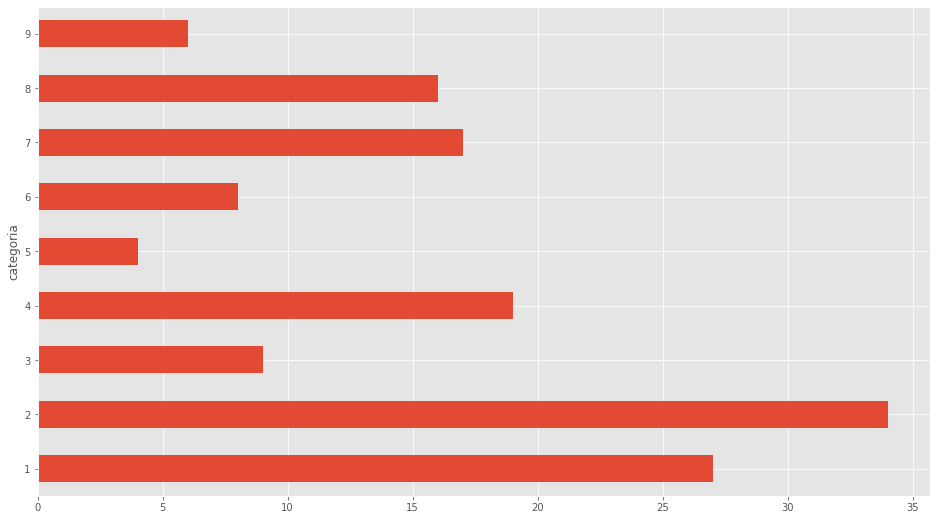

In [ ]:
df_psico.groupby('categoria').size().plot.barh()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


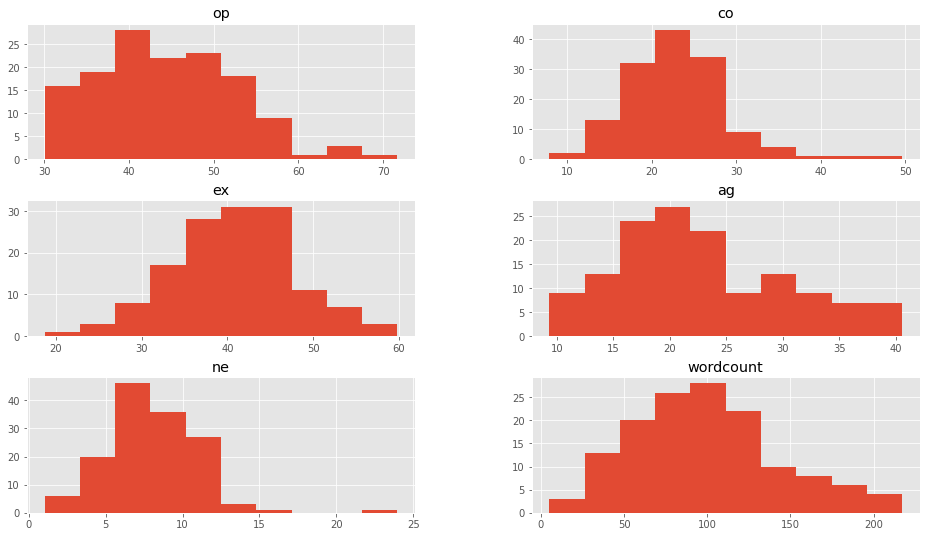

In [ ]:
#Dispersión de los mismos datos
df_psico.drop(['categoria'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


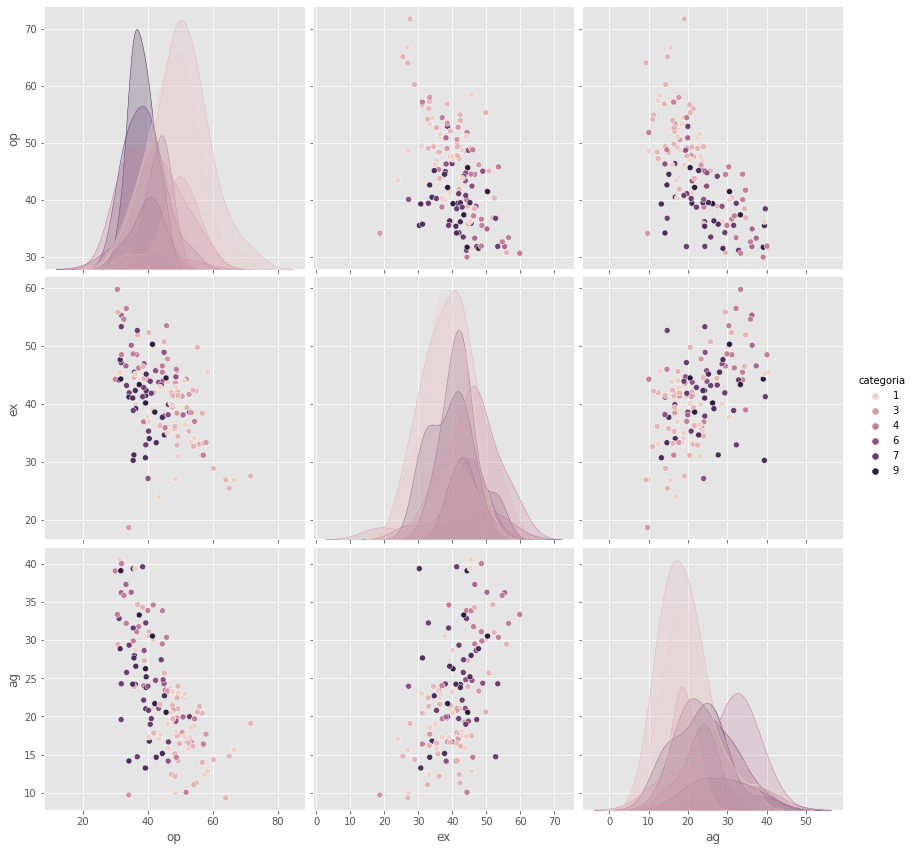

In [ ]:
#graficos de relaciones en pares en el dataset.
#hue= variación de colores dependiendo del valor de la variable
sb.pairplot(df_psico, hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')
#Revisando la gráfica no pareciera que hay algún tipo de agrupación o correlación entre los usuarios y sus categorías. 

##Separamos datos (X y Y)
Aca no trabajaremos con **train** y **test** pues no es un algoritmo de aprendizaje supervisado

In [ ]:
#X = np.array(df_psico[["op","ex","ag"]])
X = np.array(df_psico[["op","co","ex","ag","ne"]])
y = np.array(df_psico['categoria'])
#forma de la matriz
X.shape

(140, 5)

###Graficamos los valores de X en un grafico 3D

['black', 'black', 'cyan', 'green', 'cyan', 'black', 'black', 'yellow', 'black', 'black', 'blue', 'red', 'red', 'green', 'pink', 'blue', 'cyan', 'orange', 'green', 'cyan', 'green', 'blue', 'blue', 'black', 'green', 'cyan', 'pink', 'red', 'cyan', 'blue', 'pink', 'red', 'green', 'black', 'cyan', 'yellow', 'red', 'green', 'green', 'red', 'orange', 'green', 'orange', 'red', 'red', 'green', 'orange', 'blue', 'red', 'black', 'green', 'pink', 'orange', 'green', 'pink', 'green', 'red', 'blue', 'pink', 'green', 'pink', 'cyan', 'green', 'red', 'pink', 'brown', 'red', 'red', 'green', 'cyan', 'orange', 'pink', 'pink', 'cyan', 'brown', 'green', 'pink', 'cyan', 'cyan', 'brown', 'yellow', 'green', 'cyan', 'red', 'green', 'black', 'green', 'blue', 'green', 'red', 'green', 'black', 'green', 'green', 'red', 'black', 'black', 'green', 'cyan', 'orange', 'red', 'red', 'red', 'cyan', 'green', 'cyan', 'green', 'pink', 'black', 'yellow', 'brown', 'brown', 'pink', 'brown', 'black', 'red', 'pink', 'green', 'cya

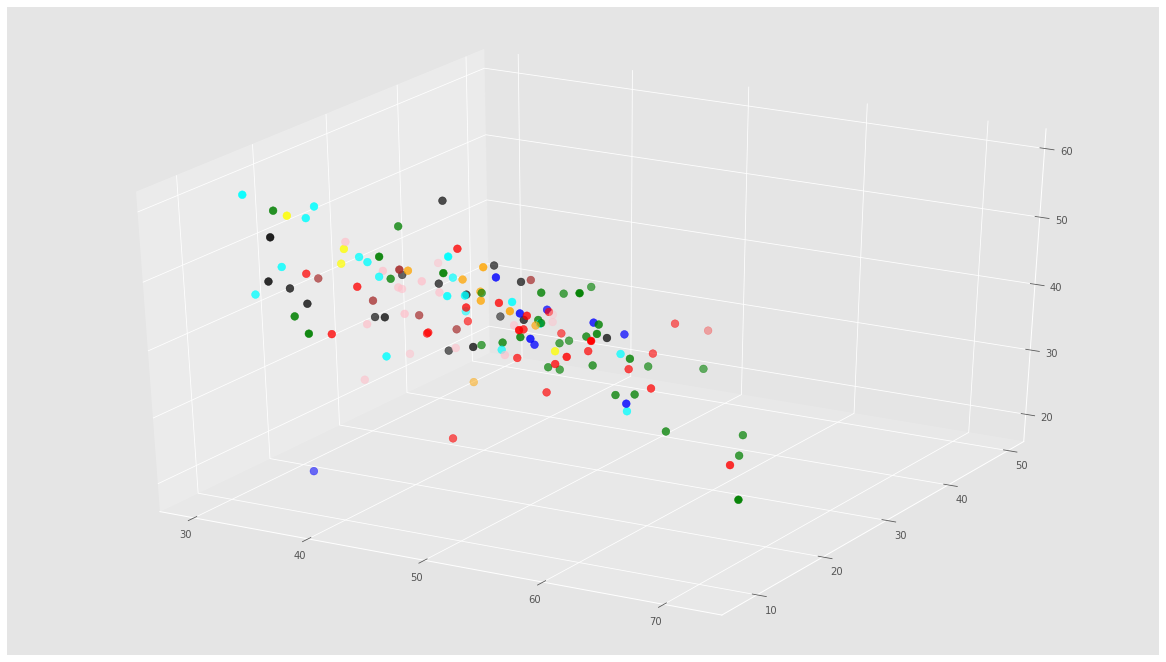

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
#10 categorias / 10 colores
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
print(asignar)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

##encontramos el total de clousters (agrupamientos) idoneo
usaremos el método de codo

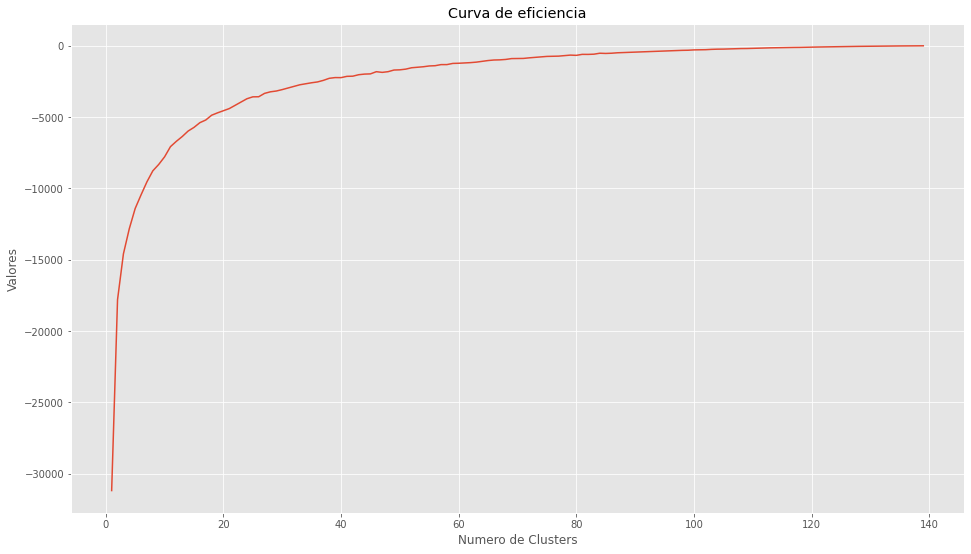

In [ ]:
Nc = range(1, 140)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero de Clusters')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

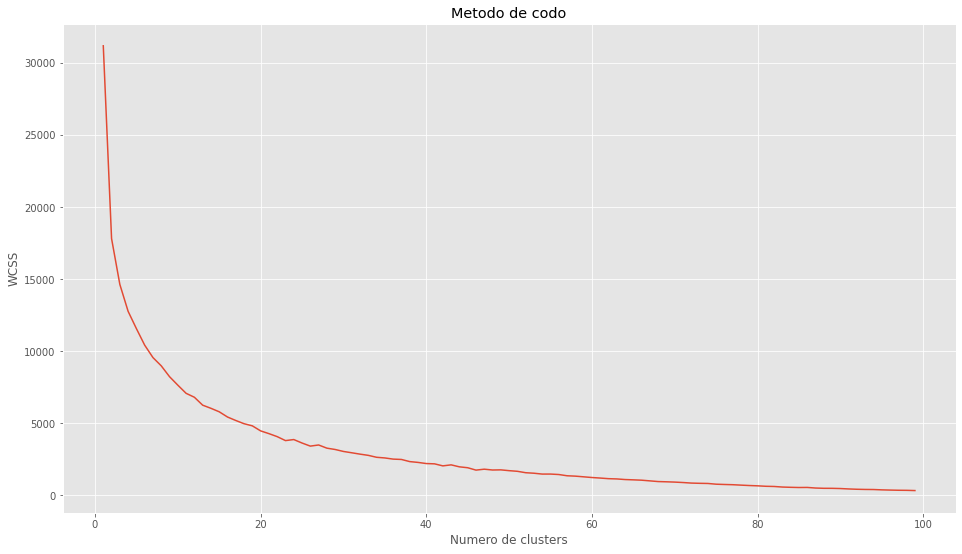

In [ ]:
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 100), wcss)
plt.title('Metodo de codo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

##Conocer los centroides

In [ ]:
kmeans = KMeans(n_clusters=20).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[33.26774456 18.42006733 45.57173389 38.28703733  8.70785756]
 [46.4281901  28.4590299  38.8387267  16.2644519   8.7386135 ]
 [51.50824079 24.57483129 35.70046343 20.813144    7.69480364]
 [43.36732757 18.012952   49.856372   30.17959043  5.01548943]
 [37.86841125 27.07686038 43.646422   22.14675062  8.73051312]
 [31.89659283 15.92909    55.9515465  31.92967183  5.00179033]
 [38.81528    17.4348775  21.3382215  13.3573675   8.9133485 ]
 [48.48327673 23.62064355 42.69348845 18.02672118  7.11717991]
 [56.79066983 23.93177617 33.67814633 14.61311233  6.36422583]
 [44.08255442 22.15064608 39.35417475 22.27202417 11.91498867]
 [39.55971143 30.41199186 35.00867757 18.81145457 10.67258343]
 [36.36081771 13.88744457 42.53418443 26.65906886  8.55930443]
 [39.31561    41.741463   30.73935    13.23122    16.201707  ]
 [65.5299666  21.4103088  27.1434742  14.6252708   3.8091508 ]
 [37.2754122  23.4707204  34.2233156  32.319383    9.4265512 ]
 [48.587099   49.637863   26.988702    9.948168    2.97

##visualizar grupos y centroides

ValueError: ignored

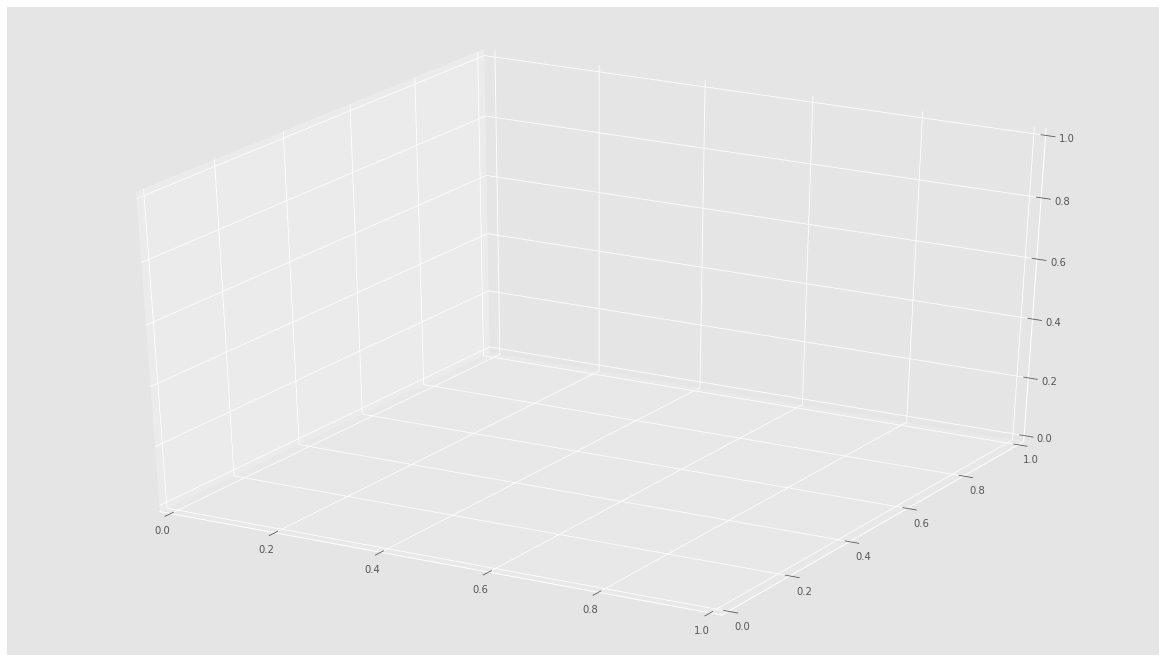

In [ ]:
#3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. 
#Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan','orange','black','pink','brown','purple','silver','olive','fuchsia','chestnut','maroon','teal','turquoise','violet','scarlet','white']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [ ]:
labels = kmeans.predict(X)
labels


##visualización en 2D

In [ ]:
# mostramos grupos según Openess y Extraversion 
f1 = df_psico['op'].values
f2 = df_psico['ex'].values
 
plt.scatter(f1, f2, c=random(20), s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
f1 = df_psico['op'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
f1 = df_psico['ex'].values
f2 = df_psico['ag'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

##Ver resultados en tablas

In [ ]:
copy =  pd.DataFrame()
copy['usuario']=df_psico['usuario'].values
copy['categoria']=df_psico['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

###diversidad por categorias laborales

In [ ]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

##usuarios con rasgos de personalidad más similares

In [ ]:
df_cluster = pd.DataFrame()
df_cluster['data_index']= df_psico.index.values
df_cluster['data_index']= df_psico.usuario
df_cluster['cluster']=kmeans.labels_
df_cluster.head()

In [ ]:
df_cluster[df_cluster.cluster == 3]

###usuarios más relevantes en cada clouster

In [ ]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest
users=df_psico['usuario'].values
for row in closest:
    print(users[row])

##clasificando nuevos datos

In [ ]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta
 
new_labels = kmeans.predict(X_new)
print(new_labels)

# DATOS DE MERCADO DE VALORES (índice S&P 500)

---


*   El índice Standard & Poor's 500, también conocido como S&P 500, es uno de los índices bursátiles más importantes de Estados Unidos. Al S&P 500 se lo considera el índice más representativo de la situación real del mercado (https://en.wikipedia.org/wiki/List_of_S%26P_500_companies)
*   Lista de empresas que forman parte del índice Dow Jones Industrial Average de https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average



---
Tomaremos los datos publicados en https://www.kaggle.com/camnugent/sandp500

La data (CSV) tiene las siguientes columnas: Fecha - en formato: yy-mm-dd



*   OPEN-Abierto - precio de la acción en el mercado abierto (estos son datos de NYSE, así que todo en USD)
*   HIGH - Alto - Precio más alto alcanzado en el día
*   Low Close - Precio más bajo alcanzado en el día
*   Volumen - Número de acciones negociadas   
*   nombre: el nombre del ticker de la acción

##instalando librerias

In [ ]:
# necesitamos la libreria WIKITABLES para descargar tablas de Wikipedia (y mantener actualizada la data)
# Necesitamos la libreria FSSPEC (Interfaces de sistema de archivos para Python)
# Necesitamos la libreria  beautifulsoup4 : para raspado web altamente evolucionadas
!pip install wikitables
!pip install fsspec
!pip install beautifulsoup4 

##Importando librerías

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D   #para graficas en 3D

import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

#from wikitables import import_tables    # para descargar tablas de Wikipedia
from sklearn.decomposition import PCA   # Análisis de componentes principales (PCA).

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##importando dataset

In [ ]:
df_acciones = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/K_means_indice_S%26P_500.csv")
df_acciones.head(5)

## conociendo y Preprocesando los datos



Vamos a usar datos semanales desde 2013 a 2018, donde cada acción tiene su propio rango de valores. Por ejemplo:
 

*   Apple (APPL) empieza en $67.85

*   Adobe (ADBE) en $39.12.

---

La intención de este ejercicio es agrupar las acciones por el comportamiento de sus ganancias, en vez de por su precio de mercado. De esta forma el rendimiento de cada acción es comparable con los demás.


In [ ]:
#df_acciones.shape
#df_acciones.info()
#df_acciones.describe()
df_acciones.isnull().sum()

###Eliminando filas vacias
---

eliminamos los datos vacíos (NA) y resetamos el índice

In [ ]:
df_acciones = df_acciones.dropna()   # Se eliminan filas que tengan valor NaN.
df_acciones = df_acciones.reset_index(drop=True)

###cambiando el tipo de dato en columnas

In [ ]:
df_acciones['date']=pd.to_datetime(df_acciones['ate'])       # Convertimos el campo DATE en tipo fecha
df_acciones = df_acciones.rename(columns={'Name':'symbol'})   #cambiamos el nombre la col de NAME a  SYMBOL
df_acciones.head()

###Descargamos la lista de las 500 compañias S&P 

---

Descargamos la tabla de wikipedia [ https://en.wikipedia.org/wiki/List_of_S%26P_500_companies ] y la guárdamos para su uso posterior

In [ ]:
wikiurl="https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"   # pagina de wikipedia donde esta la tabla
table_class="wikitable sortable jquery-tablesorter"                   # clase de la tabla
response=requests.get(wikiurl)                                        # hacemos un request(petición)a la pagina
print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')                    # parceamos el texto htmlt
indiatable=soup.find('table',{'id':"constituents"})                   # buscamos el objecto puede ser por la clase o por el ID
df_list_table=pd.read_html(str(indiatable))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df_companies=pd.DataFrame(df_list_table[0])                                        # convertimos la lista en un dataframe
df_companies.to_csv('companies.csv', index_label='row')
df_companies.head()


###Descargamos la lista de las empresas que cotizan con el índice bursáil DOW JONES DJIA 

---

Descargamos la tabla de wikipedia [https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average] y la guárdamos para su uso posterior

In [ ]:
wikiurl="https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average"   # pagina de wikipedia donde esta la tabla
table_class="wikitable sortable jquery-tablesorter"                   # clase de la tabla
response=requests.get(wikiurl)                                        # hacemos un request(petición)a la pagina
print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')                    # parceamos el texto htmlt
indiatable=soup.find('table',{'id':"constituents"})                   # buscamos el objecto puede ser por la clase o por el ID
df_list_table=pd.read_html(str(indiatable))                           # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df_DowJones=pd.DataFrame(df_list_table[0])                            # convertimos la lista en un dataframe
df_DowJones.to_csv('DowJones.csv', index_label='row')
df_DowJones.head()

In [ ]:
df_DowJones.info()
df_DowJones.describe()

###definidiendo que columnas usaremos para el ejercicio

---
Para este análisis, no solo consideremos la fecha, el precio al cierre y el símbolo.


In [ ]:
df_acciones = df_acciones[['date', 'close', 'symbol']]
df_acciones.head()

In [ ]:
df_acciones.shape

###invertir el dataframe para tener las acciones por fecha y por empresa

colocamos como indice la fecha, como columnas los iniciales de las empresas y como valor el CLOSE de cada celda

In [ ]:
#colocamos como indice la fecha, como columnas los iniciales de las empresas y como valor el CLOSE de cada celda
df_acciones = df_acciones.pivot(index='date', columns='symbol', values='close')
df_acciones = df_acciones.dropna(axis=1)    #borramos filas vacias
df_acciones.head(5)

###Normalización de los datos usando como base la fecha

---
Puede decidir volver a muestrear los datos:

*  W - para datos semanales
*  M - para datos mensuales
*  Q - para el trimestre
*  A - por año

In [ ]:
df_acciones = df_acciones.resample('W').last()
df_acciones.head()

##Graficando datos

---



1.   crear funcion para traer los nombres de la empresa 




In [ ]:
#funcion para sacar el  nombre de las empresas segun  su sigla
def get_name(symbol):
    name = symbol
    try:
        name= df_companies.loc[df_companies['Symbol'] == symbol]['Security'].values[0]
    except:
        name='No tiene nombre el simbolo'
    return name

def plot_stock(symbol, df_acciones=df_acciones):
    name = str(get_name(symbol))
    df_acciones[symbol].plot(title=name, label=name, alpha=0.9);

In [ ]:
get_name('AAL')

In [ ]:
plot_stock('MSFT')
plot_stock('AAPL')
plt.title(' Valor de Cierre de las acciones')
plt.legend();

###Calcular los rendimientos para que podamos comparar las acciones

---
Calcularemos la devolución desde el primer día de la compra. Por lo tanto, el rendimiento de un día determinado es cuánto se ganaría (o perdería), en porcentaje, si las acciones se vendieran en este día (los costos de transacción no se consideran)


In [ ]:
#df_acciones.head()
start = df_acciones.iloc[0]  #traemos la primera fila y la volvemos un vector
#calculamos el valor del retorno de la acción
returns = (df_acciones - start) / start
returns

In [ ]:
plt.figure(figsize = (20,8))
plot_stock('MSFT', df_acciones=returns)
plot_stock('AAPL', df_acciones=returns)
plt.title('Ganancias de las acciones')
plt.legend();

###¿Cuáles fueron las acciones de mejor y peor desempeño?

### las mejores y las peores 5 empresas con retorno

In [ ]:
best = returns.iloc[-1].sort_values(ascending=False).head() # traemos las acciones mejor ordenadas
worst = returns.iloc[-1].sort_values().head()   #traemos las acciones con el orden inverso (las peores)
print ('--------peores--> ', worst.shape)
print(worst)
print ('--------mejores--> ',best.shape)
print(best)

####Las mejores

In [ ]:
print('____mejor rendimiento de las acciones_____')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in best.index.tolist()]}, index = best.index)
best = pd.concat((best, names), axis=1)
best.head()

In [ ]:
plot_stock('NVDA')
plot_stock('NVDA', df_acciones=returns)
plt.title('Mejores acciones según el valor de cierre VS ganacia en las ventas')
plt.legend();

####las peores

In [ ]:
print('Peores perdidas de acciones')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in worst.index.tolist()]}, index = worst.index)
worst = pd.concat((worst, names), axis=1)
worst

In [ ]:
plot_stock('CHK')
plot_stock('CHK', df_acciones=returns)
plt.title('PEORES acciones según el valor de cierre VS ganacia en las ventas')
plt.legend();

##Conociendo el indice de acciones del DOWN JONES

In [ ]:
#cargamos en una lista las acciones de las empresas que se riguen por el indice del DOWN JONES
down_acciones = [s for s in df_DowJones['Symbol'] if s in df_acciones.columns]  
dow_returns = returns[df_DowJones]   #calculamos las ganancias 
dow_returns.head(30)

In [ ]:
print(down_acciones)

### calculamos los mejores y los peores del DOWN JONES

In [ ]:
best_dow = dow_returns.iloc[-1].sort_values(ascending=False).head()
worst_dow = dow_returns.iloc[-1].sort_values().head()
print('mejores...', best_dow)
print('peores...', worst_dow)
#-----------------------
print('Las cinco mejores rendimientos de las acciones Dow Jones')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in best_dow.index.tolist()]}, index = best_dow.index)
best_dow = pd.concat((best_dow, names), axis=1)
#best_dow

####Las mejores

In [ ]:
plot_stock('A', df_acciones=returns)
plt.title('Mejor rendimiento de acciones en el Down Jones')
plt.legend();

####Las peores

In [ ]:
print('Las cinco peores rendimientos de las acciones Dow Jones')
names = pd.DataFrame({'name':[get_name(symbol) for symbol in worst_dow.index.tolist()]}, index = worst_dow.index)
worst_dow = pd.concat((worst_dow, names), axis=1)
worst_dow

#DATOS DE MERCADEO DE VALORES (Acciones de XXXXX)

---
Vamos a aplicar el algoritmo sobre un conjunto de datos de las acciones de XXX en bolsa de Estados unidos, donde bucaremos :


*   la señal CLOSE (precio de cierre diario) 
*   la señal VOLUME (número de acciones que han cambiado de manos a lo largo de dicho período de tiempo).


https://es-us.finanzas.yahoo.com/


https://github.com/alejandro2232/deep_learning/blob/master/Datasets/starbucks.csv

##Importando librerías generales

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##Descargando data usando Web-scrawping

https://es-us.finanzas.yahoo.com/quote/SBUX/history?p=SBUX&.tsrc=fin-srch

###Consumiendo data (web scraping) 

In [ ]:
#UrlWeb="https://es.wikipedia.org/wiki/Departamentos_de_Colombia"
#ClassName="wikitable sortable jquery-tablesorter"
UrlWeb= "https://raw.githubusercontent.com/alejandro2232/deep_learning/master/Datasets/starbucks.csv"
ClassName="W(100%) M(0)"                                                               #clase de la tabla 

####Op1-con BeautifulSoup

In [ ]:
import requests                           # libreria para manejar pedidos internet
from bs4 import BeautifulSoup             # libreria para parsear documentos HTML

In [ ]:
response=requests.get(UrlWeb)                                        # hacemos un request(petición)a la pagina
print(response.status_code)
# parse data from the html into a beautifulsoup object
soup = BeautifulSoup(response.text, 'html.parser')                    # parceamos el texto htmlt
tabla= soup.find_all(class_=ClassName)
df_list_table=pd.read_html(str(tabla))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
dfs=pd.DataFrame(df_list_table[0])                                        # convertimos la lista en un dataframe
#df.to_csv('dataAcciones.csv', index_label='row')
df.head()

####Opt2-con Selenium (cuando bloquean las páginas para robots)

---
A diferencia de Scrapy y de BeautifulSoup, Selenium no trabaja con el texto fuente en HTML de la web en cuestión, sino que carga la página en un navegador sin interfaz de usuario que crea un DOM ( Document Object Model-modelo de objetos de documento). En este navegador se puede simular clic's 
*   URL → Solicitud HTTP → HTML → Selenium → DOM


In [ ]:
#!pip install kora -q
!apt install chromium-chromedriver
!pip install selenium

In [ ]:
# Nose que le cambie accidentalmente al programa pero de un momento a otro me empezo a dar un error aqui
from kora.selenium import wd
wd.get(UrlWeb)
soup = BeautifulSoup(wd.page_source, 'html.parser') 

In [ ]:
tabla= soup.find_all(class_=ClassName)
df_list_table=pd.read_html(str(tabla))                                      # LEEMOS el THEAD y TBODY y lo guardamos en una lista
df=pd.DataFrame(df_list_table[0])                                        # convertimos la lista en un dataframe

In [ ]:
#df.head(10)                                                       #LAS PRIMERAS FILAS
df.tail(10)                                                         #Las ultimas filas

In [ ]:
#tenemosque borrar la ultima fila
df = df[:-1]

##Conociendo los datos descargados

In [ ]:
print(df.info())
print("____________describe____________\n",df.describe())
print("____________nulos?____________\n",df.isnull().sum())
#print("Rows, Cols->",df.shape)

###Normalización de los datos.

---
Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo:
*   conversión de datos de object a int/float o dateime
*   eliminar campos que no usaremos
*   En este caso utilizaremos la función MinMaxScaler() que normaliza todos los datos entre [0, 1].


####Convertimos los campos object a datetime o numeric (int/float)

In [ ]:
df['Fecha']= df['Fecha'].str.replace(' ene ','/01/')
df['Fecha']= df['Fecha'].str.replace(' feb ','/02/')
df['Fecha']= df['Fecha'].str.replace(' mar ','/03/')
df['Fecha']= df['Fecha'].str.replace(' abr ','/04/')
df['Fecha']= df['Fecha'].str.replace(' may ','/05/')
df['Fecha']= df['Fecha'].str.replace(' jun ','/06/')
df['Fecha']= df['Fecha'].str.replace(' jul ','/07/')
df['Fecha']= df['Fecha'].str.replace(' ago ','/08/')
df['Fecha']= df['Fecha'].str.replace(' sep ','/09/')
df['Fecha']= df['Fecha'].str.replace(' oct ','/10/')
df['Fecha']= df['Fecha'].str.replace(' nov ','/11/')
df['Fecha']= df['Fecha'].str.replace(' dic ','/12/')

In [ ]:
df['Fecha']=pd.to_datetime(df['Fecha'], dayfirst = True)        # Convertimos el campo FECHA en tipo DATETIME
df['Abrir'] = pd.to_numeric(df['Abrir'])                        #  convertimos el campo a numerico 
df['Alto'] = pd.to_numeric(df['Alto'])
df['Bajo'] = pd.to_numeric(df['Bajo'])
df['Cierre*'] = pd.to_numeric(df['Cierre*'])
df['Cierre ajustado**'] = pd.to_numeric(df['Cierre ajustado**'])
df['Volumen'] = pd.to_numeric(df['Volumen'])

In [ ]:
#salvamos el dataFrame 
df.to_csv('Precio_petroleo_2021_2022.csv', index_label='row')

####Eliminando columnas que no necesitaremos (por ahora)

---
extraemos la columna DATE (fecha) que no usaremos en el algoritmo k-means. Antes de extraerla la guardaremos en la variable dates, ya que volveremos a insertarla en nuestro dataframe tras aplicar el algoritmo


In [ ]:
#borrar nulos o no?
df = df.dropna()
df = df.reset_index(drop=True)

In [ ]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Fecha'] # Guardamos la columna Date.
df = df.drop('Fecha', 1) # Borramos la columna del dataframe.

####normaliza todos los datos entre [0, 1].

---
En este caso utilizaremos la función MinMaxScaler()


In [ ]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0:'Abrir',1:'Alto',2:'Bajo',3:'Cierre*',4: 'Cierre ajustado**', 5: 'Volumen'})

In [ ]:
df_escalado.head()
#df_escalado.isnull().sum()

###Representación gráfica de los datos.

---


*   Ahora podemos echar un vistazo a la representación gráfica de nuestros datos. En el eje x representaremos el precio de cierre (CLOSE) y en el eje y el volumen (VOLUMEN)
*   VAMOS A representar gráficamente los datos normalizados, pero que, si hubiésemos representado los datos sin normalizar la gráfica sería exactamente igual, con la única diferencia que la escala de los ejes sería diferente.





In [ ]:
#%% Representación gráfica de los datos.
x = df_escalado['Cierre*'].values
y = df_escalado['Volumen'].values
plt.xlabel('Cierre de precios')
plt.ylabel('Volumen')
plt.title('petroleo  CIERRE vs. VOLUMEN')
plt.plot(x,y,'o',markersize=3)

##Aplicación de k-means.

---
El primer paso antes de aplicar k-means es decidir qué valor de k (número de clústeres) queremos usar:


1.    Una forma de elegir este valor k es por criterio propio: si conocemos bien la distribución de nuestros datos y queremos “forzar” un número determinado de clústeres simplemente lo elegimos
2.    realizar una gráfica elbow o de codo para determinar el número óptimo de clústeres. Hacemos una iteración de k-means variando el valor de k, de forma que representamos en el eje x dicho valor de k y en el eje y la suma de los errores cuadráticos (SSE). De esta forma podemos elegir el valor de k dónde se produce el “codo”   (**----ESTA ME GUSTA MÁS---**)




###Realizar una gráfica elbow o de codo

In [ ]:
#%% Curva elbow para determinar valor óptimo de k.
nc = range(1, 30) # El número de iteraciones que queremos hacer.
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)

####NOTA: 

---


**No hay una solución, un valor de k, más correcto que otro**, ya que el objetivo de una clusterización con k-means es obtener información útil nuestros datos, por lo que **nuestra interpretación a posteriori de los clústeres creados marcará la calidad de nuestra solución** escogida

###Aplicar el algoritmo de k-mean

In [ ]:
#%% Aplicación de k-means con k = 5.
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)   #coordenadas de los centroides

###Etiquetado de datos.

---
asignamos cada registro de nuestro dataset a uno de los clústers


In [ ]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df.insert(0, 'Date', dates)           #%% Añadimos la columna de fecha

In [ ]:
df.head(10)

##Representación gráfica de los clústeres k-means.

---
Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que hemos usado sólo dos variable


In [ ]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=4)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('Precio de cierre')
plt.ylabel('Volumen')
plt.title('petrole stocks k-means clustering')
plt.show()

**Que podemos inferir???**